In [1]:
print("helloooooo")

helloooooo


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = sns.load_dataset("titanic")

In [10]:
df.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [13]:
df.shape

(891, 15)

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
print(np.round(((df['embarked'].isnull().sum())/len(df)),3)*100)
print(np.round(((df['age'].isnull().sum())/len(df)),3)*100)
print(np.round(((df['deck'].isnull().sum())/len(df)),3)*100)

0.2
19.900000000000002
77.2


In [ ]:
df = df.dropna

In [3]:
df1=pd.read_csv("house_purchased.csv")

In [22]:
df1.sample(3)

,price,area,purchased
405,3465000.0,3060.0,0
35,8080940.0,7000.0,0
486,2870000.0,6000.0,0


In [6]:
import sklearn as sklearn

In [5]:
from sklearn.model_selection import train_test_split
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
x_train, x_test, y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=32)


In [8]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')


In [9]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer([
    ('imputer1',imputer1,['price']),
    ('imputer2',imputer2,['area'])
],remainder='passthrough')

In [11]:
new_x_train = trf.fit_transform(x_train)
new_x_test = trf.transform(x_test)

In [12]:
new_x_train = pd.DataFrame(new_x_train, columns=x_train.columns)
new_x_test = pd.DataFrame(new_x_test, columns=x_test.columns)

In [13]:
new_x_train.isnull().sum()

price    0
area     0
dtype: int64

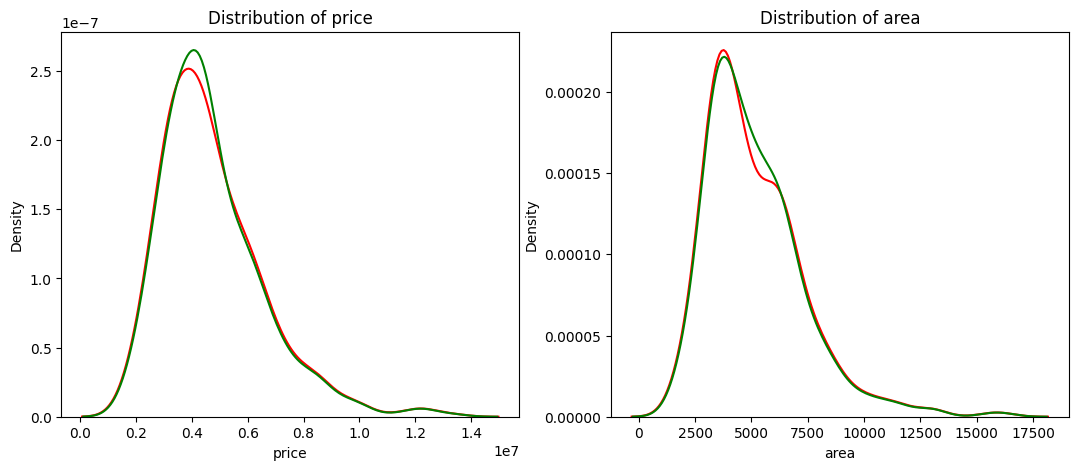

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(13,5))
sns.kdeplot(data=x_train, x='price',color='red',ax=ax1)
sns.kdeplot(data=new_x_train , x='price', color='green', ax=ax1)
ax1.set_title("Distribution of price")
sns.kdeplot(data=x_train , x='area',color='red',ax=ax2)
sns.kdeplot(data=new_x_train, x='area', color='green', ax=ax2)
ax2.set_title("Distribution of area")
plt.show()

In [15]:
imputer1 = SimpleImputer(strategy='constant', fill_value=-1)
imputer2 = SimpleImputer(strategy='connstant',fill_value=0)

In [16]:
trf1= ColumnTransformer([
    ('imputer1', imputer1,['price']),
    ('imputer2', imputer2,['area'])
],remainder='passthrough')

In [18]:
new_x_train = pd.DataFrame(new_x_train, columns=x_train.columns)
new_x_test =  pd.DataFrame(new_x_test, columns=x_test.columns)

In [19]:
new_x_train.isnull().sum()

price    0
area     0
dtype: int64